# Describing Data Statistically

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

sales_data = pd.read_csv('datasets_csv/CH03/ex3-14.txt')
sales_data.columns = ['Year', 'Month', 'Sales'] #strip out the double quotes
sales_data.head()

,Year,Month,Sales
0,1,1,101.9
1,2,1,109.0
2,3,1,115.5
3,4,1,122.0
4,5,1,128.1


### Measures of central tendancy

In [14]:
print('Mean ' + str(sales_data.Sales.mean()))
print('Median ' + str(sales_data.Sales.median()))
print('Mode ' + str(sales_data.Sales.mode()))

Mean 118.7
Median 116.95
Mode 0    117.5
dtype: float64


### Measuring dispersion - Inter Quartile Ranges

In [17]:
quartiles = sales_data.Sales.quantile(q=[0.25, 0.5, 0.75])
quartiles

0.25    108.275
0.50    116.950
0.75    128.175
Name: Sales, dtype: float64

In [21]:
IQR = quartiles[0.75] - quartiles[0.25]
IQR

19.899999999999991

### Histogram of sales data

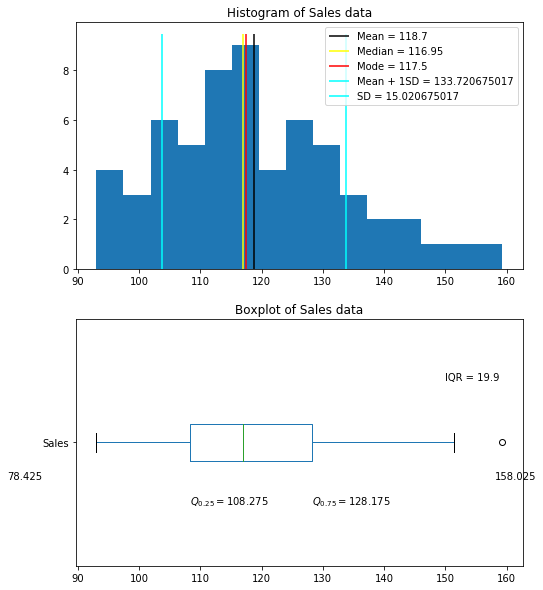

In [88]:
#create a subplot to show box plot and histogram next to each other
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8,10))

#plot a histogram using Pandas.
hax = sales_data.Sales.hist(ax = axs[0], bins=15, grid=False)
hax.set_title('Histogram of Sales data')

#get the axis bounds
hax_bounds = hax.axis()

#plot the mean in black
mean = sales_data.Sales.mean()
hax.vlines(mean, hax_bounds[2], hax_bounds[3], label='Mean = ' + str(mean))

#plot the median in yellow
median= sales_data.Sales.median()
hax.vlines(median, hax_bounds[2], hax_bounds[3], label='Median = ' + str(median), colors='yellow')

#plot the mode in red
mode= sales_data.Sales.mode()[0]
hax.vlines(mode, hax_bounds[2], hax_bounds[3], label='Mode = ' + str(mode), colors='red')

#Get the standard deviation
sd = sales_data.Sales.std()

#get mean +- 1SD lines
m1sd = mean + 1*sd
m1negsd = mean - 1*sd
hax.vlines(m1sd, hax_bounds[2], hax_bounds[3], label='Mean + 1SD = ' + str(m1sd), colors='cyan')
hax.vlines(m1negsd, hax_bounds[2], hax_bounds[3], label='SD = ' + str(sd), colors='cyan')

hax.legend()


############## plot 2
#now plot the box plot
bax = sales_data.Sales.plot(kind='box', ax = axs[1], title = 'Boxplot of Sales data', vert=False)
#vert False to make it horizontal

#Get the quartiles
quartiles = sales_data.Sales.quantile([0.25, 0.5, 0.75])
bax.text(quartiles[0.25], 0.75, r'$Q_{0.25}= ' + str(quartiles[0.25])+'$')
bax.text(quartiles[0.75], 0.75, r'$Q_{0.75}= ' + str(quartiles[0.75])+'$')

#Calculate the IQR
iqr = quartiles[0.75] - quartiles[0.25]
bax.text(x=150, y=1.25, s='IQR = ' + str(iqr))

#Get the Left inner quartile
liq = quartiles[0.25] - 1.5*iqr
bax.text(x=liq, y=0.85, s=str(liq))

#Get the right inner quartile
riq = quartiles[0.75] + 1.5*iqr
bax.text(x=riq, y=0.85, s=str(riq))



## Measures of dispersion - Standard Deviation
Range (max val - min val), IQR - inter quartile range are a few measures to find the spread of data and outliers. Another quantitative way is variance and standard deviation.

$$
\mu = \verb !population mean (cannot be calculated in most cases)!
\\
\bar y = \verb !(y bar) sample mean!
\\
\bar y = \frac{\sum_{i}^{n}y_i}{n}
$$

`Variance` is the mean squared deviation from mean. Thus $\sigma^2$ is `variance of population` and $s^2$ is `variance of sample`

$$
s^2 = \frac{\sum_{i}^{n}(y_i - \bar y)^2}{(n-1)}
$$

`s` = `standard deviation` is square root of variance.
$$
s = \sqrt{\frac{\sum_{i}^{n}(y_i - \bar y)^2}{(n-1)}}
$$

We divide the sum of squared deviation by `(n-1)` because we don't want the sample SD to be underestimated. This is because, we can estimate the SD of population by averaging the SDs of multiple samples. During this process, if we divided by `n` instead of `n-1`, then the SD of population is underestimated.

For a `normal`ly distributed population, empirically,
$$
\bar y \pm 1s = 68\% \verb ! of data!
\\
\bar y \pm 2s = 95\% \verb ! of data!
\\
\bar y \pm 3s = 97.7\% \verb ! of data!
$$

Thus range is max - min value. Hence $range = 6s$

#### Coefficient of variability
To compare the dispersion of two different variables (of different ranges and units), we can normalize them to a common unitless measure called `CV`.

$$
CV = \frac{s}{|\bar y|}
$$

### Dispersion based on percentiles
A `percentile` : `p`th percentile is the value such that `p`% of values are less than this and `100-p`% are higher than that value. Thus `80`th percentile means, `79.9%` of data points are less than this and `19.9%` values are higher than this.

**Quantile** is the same as **percentile** but expressed in **decimals**. Thus `80`th percentile = `0.8` quantile.

**Quartile** is quantile at every quarter. Thus `0.25`, `0.5`, `0.75` quantiles are quartiles. **Note**: `0.5` quantile is same as **Median**.

`IQR` **InterQuartile Range** is the difference between `75`th and `25`th percentiles. (0.75 and 0.25 quartiles).

### Correlation coefficient
To determine the linear relationship between two variables, we determine how each of the measurement pairs deviate from their corresponding means.

$$
r = \frac{\sum_{i}^{n}(x_i - \bar x)(y_i - \bar y)}{(n-1)s_x s_y}
$$

where $s_x$ is standard deviation of $x$ and so on. **$r$** is called **Pearson's r**

`r` ranges from `-1 to 1`. A value of `-1` indicates strong negative relationship and vice versa. A value close to `0` might represent no relationship or presence of a non-linear relationship.

The numerator, is called the `covariance` of `x` and `y`, which is the combined deviation from their corresponding means.

### When is big data needed?
Are all problems a big data problem? Can problems be solved with sampling and handling a subset of data? **Yes**, most often, quality and **representiveness** of data is more important than quantity.

The cases where big-data is needed is when data is **sparse**, when thousands of **predictors** is required over millions of data points, where values of most predictors is **0**. This is a very sparse data set. For such cases, big data improves the accuracy and random sampling cannot just produce a representative sample.